# Q1

# 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from tabulate import tabulate as tab

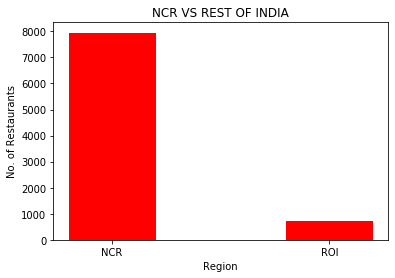

Restaurants in NCR   = 7947
Restaurants in ROI   = 705


In [316]:
data = pd.read_csv('C:/Users/user/Desktop/Datasets/zomato.csv' ,encoding = 'latin-1')
d = data.copy()
india = d[d['Country Code']== 1 ]
ncr = india[ (india['City'] == 'New Delhi') | (india['City'] == 'Ghaziabad') | (india['City'] == 'Noida') | 
            (india['City'] == 'Gurgaon') | (india['City'] == 'Faridabad') ]
roi = india[ (india['City'] != 'New Delhi') & (india['City'] != 'Ghaziabad') & (india['City'] != 'Noida') & 
            (india['City'] != 'Gurgaon') & (india['City'] != 'Faridabad') ]
l = ['NCR' ,'ROI']
m = [len(ncr) , len(roi)]
plt.bar(l,m ,width = 0.4 , color = 'red')
plt.xlabel("Region")
plt.ylabel("No. of Restaurants")
plt.title("NCR VS REST OF INDIA")
plt.show()
print('Restaurants in NCR   =', len(ncr))
print('Restaurants in ROI   =', len(roi))

# 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [317]:
def dict(a):
    d = {}
    for i in a:
        if ',' not in i:
            d[i] = d.get(i,0) + 1
            
        else:
            c = i.strip().split(',');
            for j in c:
                d[j.strip()] = d.get(j.strip(),0)+1
    return d   
a = dict(ncr.Cuisines)
b = dict(roi.Cuisines)
uncsv = []
for i in b:
    if i not in a:
        uncsv.append(i)
        
unapi = []
headers = {'user-key':'2410d12d63fcee9d7e5d5b615283e0b5'}
params = {'city_id':'1'}
r = requests.get('https://developers.zomato.com/api/v2.1/cuisines' , 
                  headers= headers, params = params)
data = r.json()['cuisines']
for i in data:
    unapi.append(i['cuisine']['cuisine_name'])

print('List of cuisines not present in DELHI-NCR(dataset) : ',uncsv)    
print("Common List of cuisines found in the dataset of DELHI API" ,list(set(uncsv) & set(unapi)))
   



List of cuisines not present in DELHI-NCR(dataset) :  ['German', 'Malwani', 'BBQ', 'Cajun']
Common List of cuisines found in the dataset of DELHI API ['BBQ', 'Malwani']


# 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

----DELHI-NCR----
------------  ----
North Indian  3597
Chinese       2448
Fast Food     1866
Mughlai        933
Bakery         697
South Indian   569
Continental    547
Desserts       542
Street Food    538
Italian        535
------------  ----


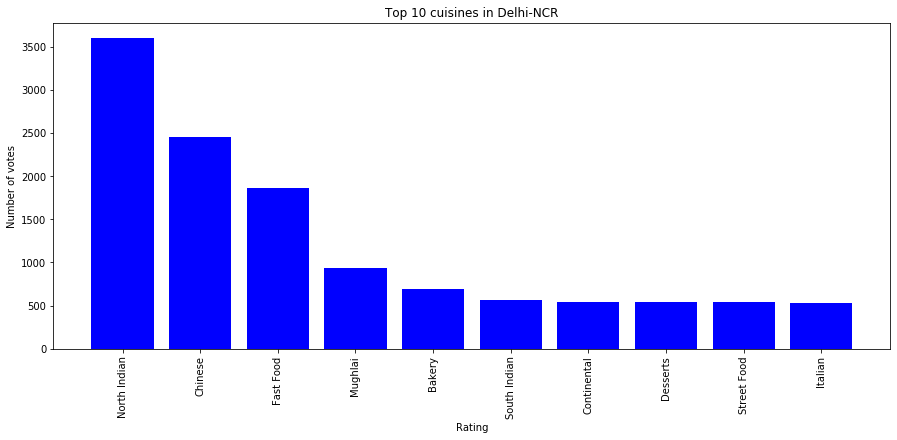

In [318]:
topncr = sorted(a.items(), key=lambda x: x[1] , reverse = True)[0:10]
toproi = sorted(b.items(), key=lambda x: x[1] , reverse = True)[0:10]
nncr = [i[0] for i in topncr] 
cncr = [i[1] for i in topncr]
nroi = [i[0] for i in toproi]
croi = [i[1] for i in toproi]

print('----DELHI-NCR----')

print(tab(list(zip(nncr , cncr))))
plt.subplots(figsize = (15,6))
plt.bar(nncr , cncr , color = 'blue')
plt.title('Top 10 cuisines in Delhi-NCR')
plt.xlabel('Rating')
plt.ylabel('Number of votes')
plt.xticks(rotation = 90)

plt.show()

----REST OF INDIA----
------------  ---
North Indian  349
Chinese       242
Continental   177
Italian       147
Cafe          136
Fast Food      97
South Indian   62
Mughlai        59
Desserts       55
Mexican        50
------------  ---


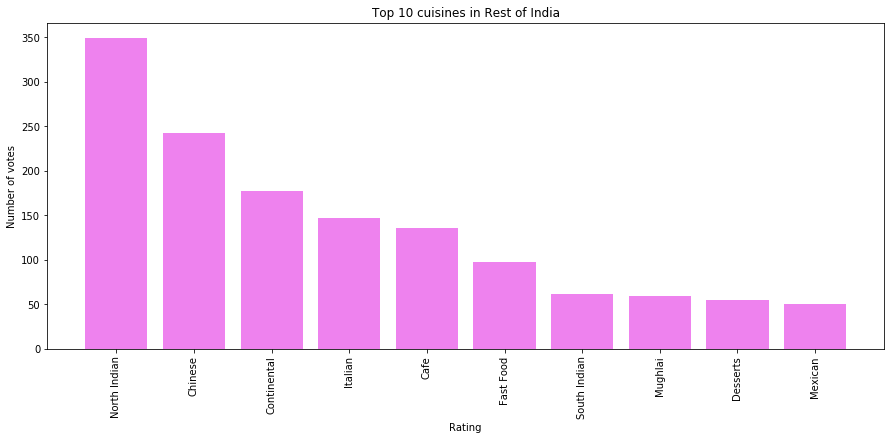

In [319]:
print('----REST OF INDIA----')
print(tab(list(zip(nroi , croi))))
plt.subplots(figsize = (15,6))
plt.bar(nroi , croi , color = 'violet')
plt.title('Top 10 cuisines in Rest of India')
plt.xlabel('Rating')
plt.ylabel('Number of votes')
plt.xticks(rotation = 90)

plt.show()

# 1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

Top 10 Cuisines in Delhi-NCR
------------  ----
North Indian  3597
Chinese       2448
Fast Food     1866
Mughlai        933
Bakery         697
South Indian   569
Continental    547
Desserts       542
Street Food    538
Italian        535
------------  ----
Top 10 Cuisines in Rest of India
------------  ---
North Indian  349
Chinese       242
Continental   177
Italian       147
Cafe          136
Fast Food      97
South Indian   62
Mughlai        59
Desserts       55
Mexican        50
------------  ---


<Figure size 432x288 with 0 Axes>

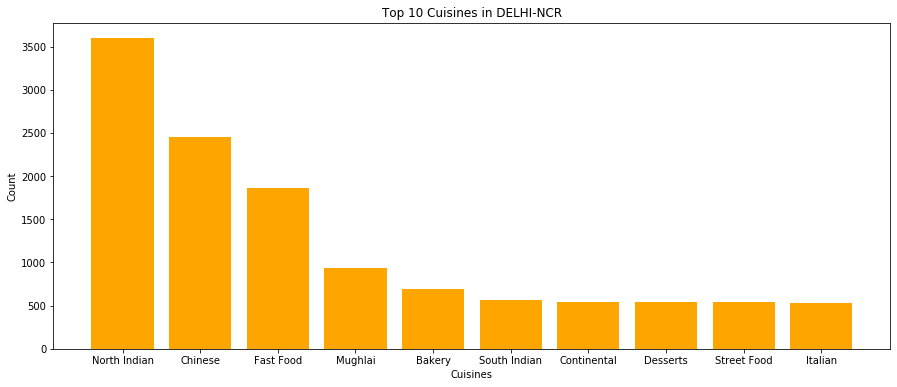

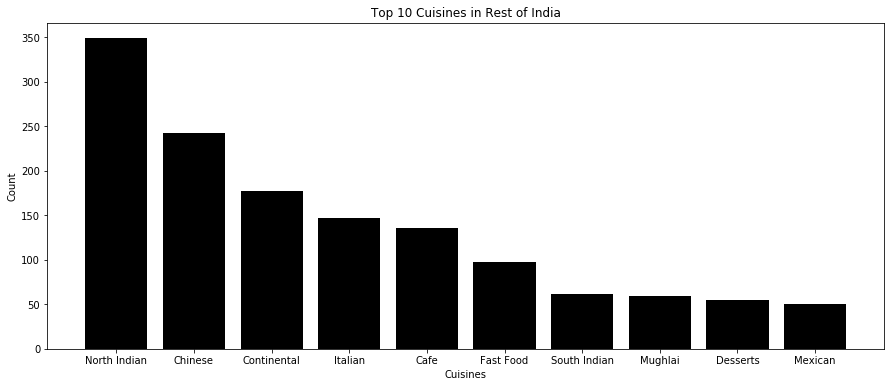

In [320]:
ncrn = [i[0] for i in topncr]
ncrc = [ int(i[1]) for i in topncr]

roin = [i[0] for i in toproi]
roic = [int(i[1]) for i in toproi]

print('Top 10 Cuisines in Delhi-NCR')
print(tab(list(zip(ncrn , ncrc))))

print('Top 10 Cuisines in Rest of India')
print(tab(list(zip(roin , roic))))

plt.figure(0)
plt.subplots(figsize = (15,6))
plt.bar(ncrn, ncrc, color = 'orange')
plt.title('Top 10 Cuisines in DELHI-NCR')
plt.xlabel('Cuisines')
plt.ylabel('Count')

plt.figure(1)
plt.subplots(figsize = (15,6))
plt.bar(roin,roic, color = 'black')
plt.title('Rest of India')
plt.title('Top 10 Cuisines in Rest of India')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.show()

Bottom 10 Cuisines of Delhi-NCR
--------------  -
Belgian         1
Persian         1
Steak           1
Charcoal Grill  1
Cuisine Varies  1
Deli            1
Sandwich        1
Mangalorean     1
Sri Lankan      1
South American  2
--------------  -
Bottom 10 Cuisines of Rest of India
----------  -
Sandwich    1
Armenian    1
Mithai      1
Steak       1
Parsi       1
Awadhi      1
Lucknowi    1
Portuguese  1
African     1
British     1
----------  -


<Figure size 432x288 with 0 Axes>

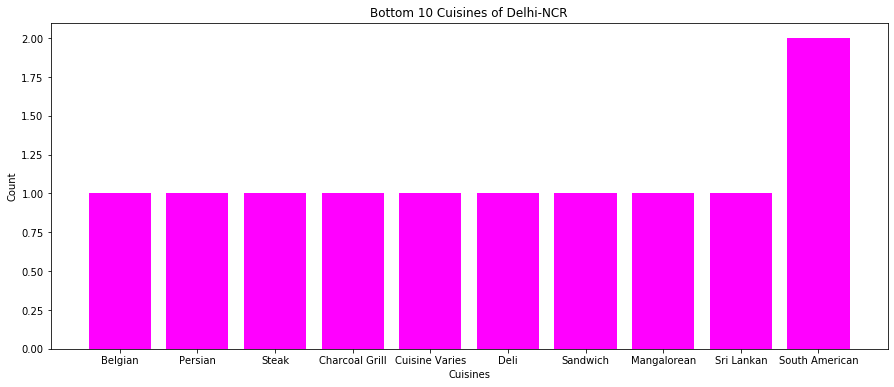

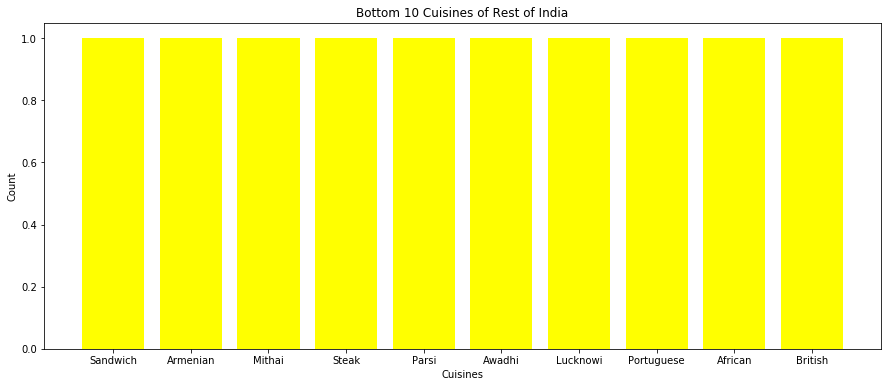

In [321]:
bottomncr = sorted(a.items(), key=lambda x: x[1] )[0:10]
bottomroi = sorted(b.items(), key=lambda x: x[1] )[0:10]

ncrb = [i[0] for i in bottomncr]
ncrcb = [ int(i[1]) for i in bottomncr]

roib = [i[0] for i in bottomroi]
roicb = [int(i[1]) for i in bottomroi]

print('Bottom 10 Cuisines of Delhi-NCR')
print(tab(list(zip(ncrb , ncrcb))))

print('Bottom 10 Cuisines of Rest of India')
print(tab(list(zip(roib , roicb))))
plt.figure(0)
plt.subplots(figsize = (15,6))
plt.bar(ncrb, ncrcb, color = 'magenta')
plt.title('Bottom 10 Cuisines of Delhi-NCR')
plt.xlabel('Cuisines')
plt.ylabel('Count')

plt.figure(1)
plt.subplots(figsize = (15,6))
plt.bar(roib,roicb, color = 'yellow')
plt.title('Rest of India')
plt.title('Bottom 10 Cuisines of Rest of India')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.show()

# Question 2

# 2.1.1 Number of Votes given Restaurant

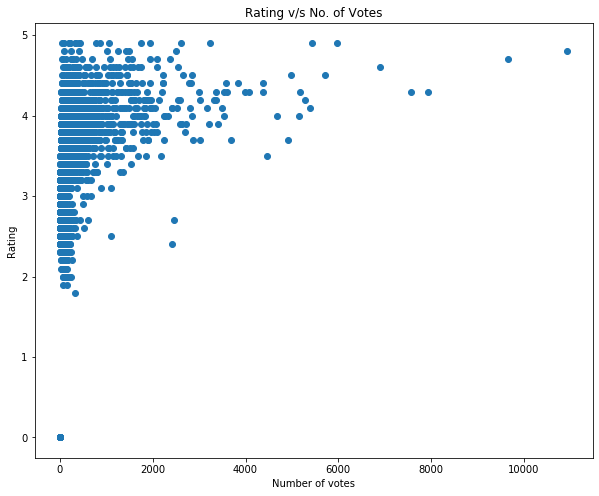

In [322]:
f = d[d['Country Code'] == 1].copy()
f = f[['Aggregate rating' , 'Votes']].copy()
rating = f['Aggregate rating']
votes = f['Votes']
a = {}

plt.subplots(figsize = (10,8))
plt.scatter(votes,rating)
plt.title('Rating v/s No. of Votes')
plt.xlabel('Number of votes')
plt.ylabel('Rating')
plt.show()

# 2.1.2 Restaurant serving more number of cuisines.

-------  -
2.05509  1
2.56342  2
2.89054  3
3.37917  4
3.48129  5
3.65143  6
3.64615  7
3.26667  8
-------  -


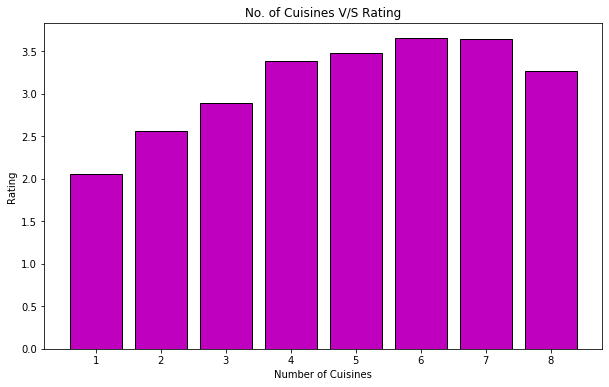

In [323]:
f = d[d['Country Code']== 1 ].copy()
f = f[['Cuisines' , 'Aggregate rating']].copy()
cuisines = f['Cuisines']
rating = f['Aggregate rating']
z = {}
def dict(a,b):
    d = {}
    for i,k in zip(a,b):
        
        s=0
        c = i.strip().split(',');
        for j in c:
            s+=1
        d[s] = d.get(s,0) + k
        z[s] = z.get(s,0) + 1     
    
    return d   

a = dict(cuisines , rating)
rate = [i for i in sorted(a)]
count = [ (a[i]/z[i]) for i in sorted(a)]

print(tab(list(zip(count,rate))))
plt.subplots(figsize = (10,6))
plt.bar(rate , count ,color = 'm' , edgecolor = 'black')
plt.title('No. of Cuisines V/S Rating')
plt.xlabel('Number of Cuisines')
plt.ylabel('Rating')
plt.show()

# 2.1.3 Average Cost of Restaurant

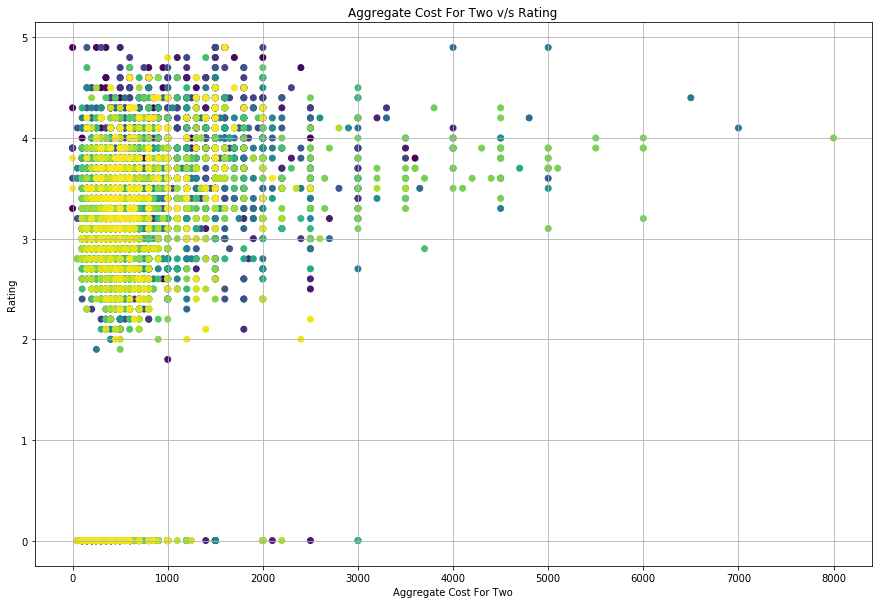

In [324]:
f = d[d['Country Code']==1].copy()
f = f[['Average Cost for two' , 'Aggregate rating']].copy()
f.dropna(inplace = True)
cost = f['Average Cost for two']
rating = f['Aggregate rating']

c = np.arange(len(cost))
plt.subplots(figsize = (15,10))
plt.scatter(cost , rating , c = c)
plt.title('Aggregate Cost For Two v/s Rating')
plt.xlabel('Aggregate Cost For Two')
plt.ylabel('Rating')
plt.grid()
plt.show()

# 2.1.4 Restaurant serving some specific cuisines.

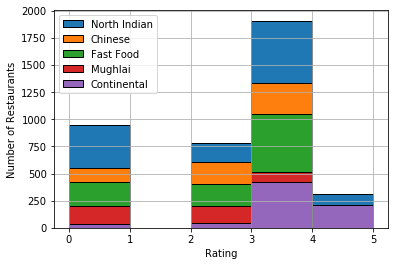

In [325]:
f = d[d['Country Code']== 1 ].copy()
f = f[['Cuisines' , 'Aggregate rating']].copy() 
cuisine = f['Cuisines']
rating = f['Aggregate rating']
z = {}
def dict(a,b):
    d = {}
    for i,k in zip(a,b):
        if ',' not in i and k>0:
            d[i.strip()] = d.get(i.strip(),0) + k
            z[i.strip()] = z.get(i.strip(),0) + 1
            
        else:
            if k>0:
                c = i.strip().split(',');
                for j in c:
                    d[j.strip()] = d.get(j.strip(),0) + k
                    z[j.strip()] = z.get(j.strip(),0) + 1     
    
    return d  
a = dict(cuisine , rating)
z = sorted(z.items(), key=lambda x: x[1] , reverse = True)[0:5]
b = {}
for i in z:
    rate = []
    for j,k in zip(cuisine ,rating):
        if i[0] in j:
            rate.append(k)
    plt.hist(rate, bins=[0,1,2,3,4,5], label =i[0],edgecolor = 'black')


plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.legend()
plt.grid()
plt.show()
        


# 2.2 Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

-------------------  -------
Connaught Place      3.85065
Defence Colony       3.75246
Malviya Nagar        3.51786
Mayur Vihar Phase 1  3.08775
Pitampura            3.26196
Rajinder Nagar       3.30685
Rajouri Garden       3.95073
Safdarjung           3.86815
Satyaniketan         3.98947
Shahdara             3.05614
-------------------  -------


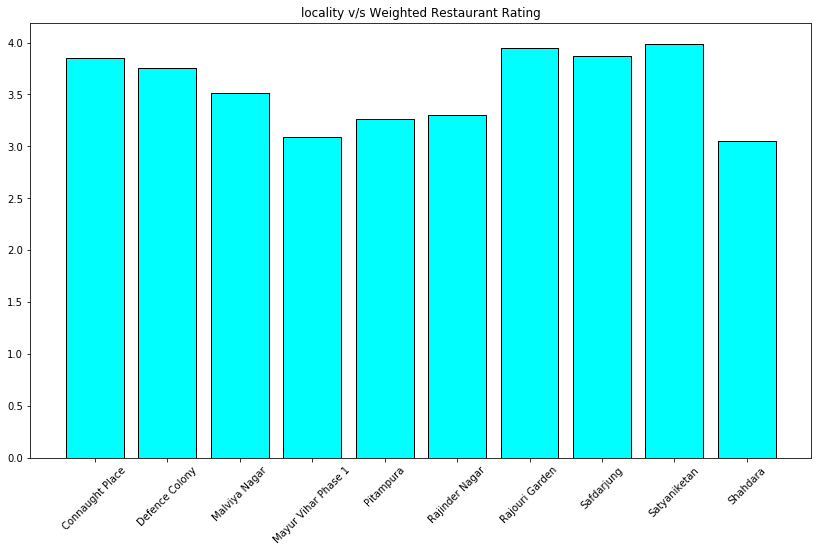

In [326]:
f = d[d['Country Code']== 1 ]
f = f[['Votes' , 'Aggregate rating', 'Locality']].copy()
f = f[f['Aggregate rating'] != 0.0]
vote = f['Votes']
rating = f['Aggregate rating']
locality = f['Locality']
z = {}
def dict(a,b,c):
    d = {}
    for i,j,k in zip(a,b,c):
        d[i] = d.get(i,0) + (j*k)
        z[i] = z.get(i,0) + (j)
                
    return d   


a = dict(locality,vote , rating)
b = {}
for i in a:
    b[i] = (a[i]/z[i])
l = d['Locality'].value_counts().index[0:10]
l = sorted(l)
locality = [i for i in l]
count = [ b[i] for i in l ]

print(tab(list(zip(locality,count))))
plt.subplots(figsize = (14,8))
plt.bar( locality ,count, color = 'cyan' ,edgecolor = 'black' )
plt.title('locality v/s Weighted Restaurant Rating')
plt.xticks(rotation = 45)
plt.show()

# 3 Visualization

# 3.1 Plot the bar graph top 15 restaurants have a maximum number of outlets.

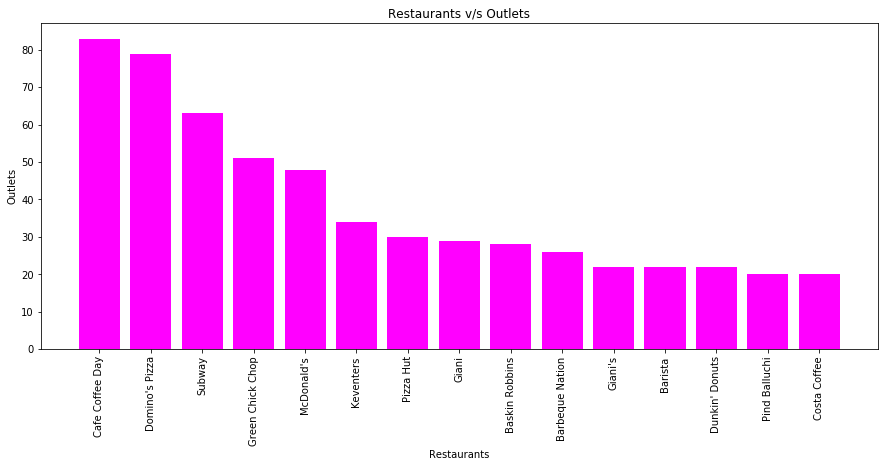

In [327]:
restaurants = d['Restaurant Name'].value_counts().index[0:15]
outlets =  d['Restaurant Name'].value_counts().values[0:15]

plt.subplots(figsize = (15,6))
plt.bar(restaurants , outlets, color = 'magenta')
plt.title('Restaurants v/s Outlets')
plt.xlabel('Restaurants')
plt.ylabel('Outlets')
plt.xticks(rotation =90)
plt.show()

# 3.2 Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

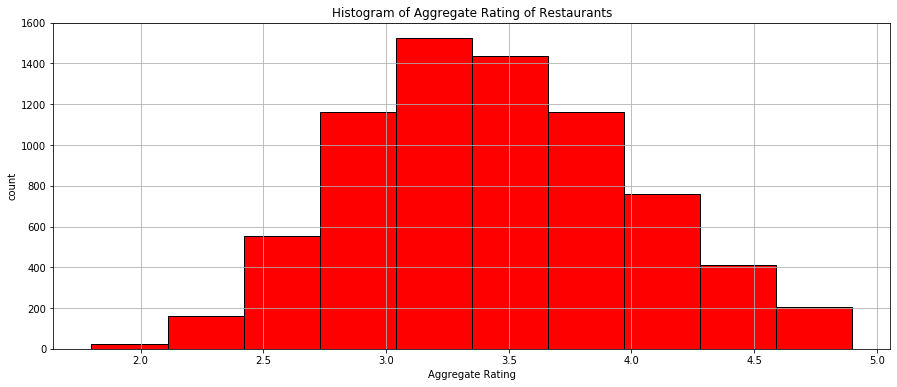

In [328]:
rating  = d['Aggregate rating']
rating = rating[rating!=0.0]
x = np.arange(1.5 , 5.5 , 0.5)

plt.subplots(figsize = (15,6))
plt.hist(rating,bins = 10,edgecolor = 'black',color = 'red')
plt.title('Histogram of Aggregate Rating of Restaurants')
plt.xlabel('Aggregate Rating')
plt.ylabel('count')
plt.grid()
plt.show()


# 3.3 Plot the bar graph top 10 restaurants in the data with the highest number of votes.

-------------------------  -----
Barbeque Nation            27835
AB's - Absolute Barbecues  13400
Toit                       10934
Big Chill                  10853
Truffles                    9682
Farzi Cafe                  9189
Chili's                     8156
Hauz Khas Social            7931
Joey's Pizza                7807
Peter Cat                   7574
-------------------------  -----


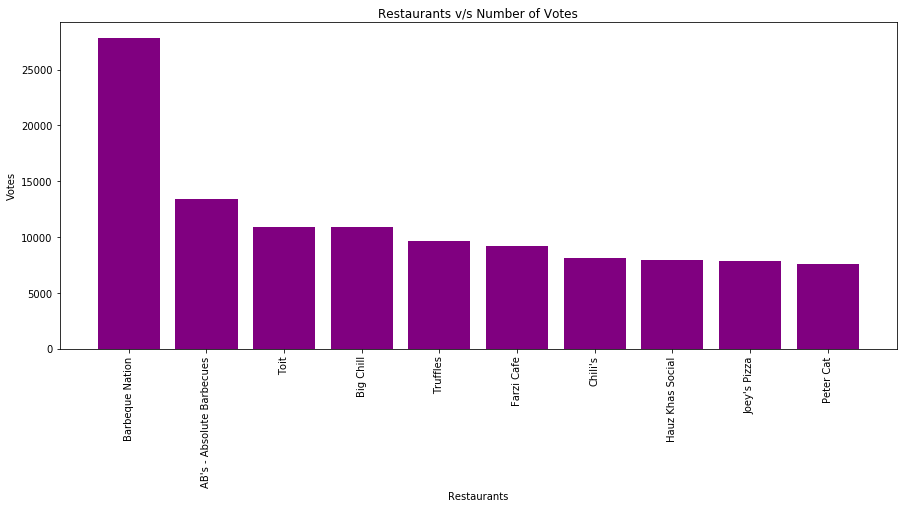

In [329]:
f = d[d['Country Code']==1].copy()
f = f[['Restaurant Name' ,'Votes' ]].copy()
restaurant= f['Restaurant Name']
votes = f['Votes']
n = len(restaurant)
a = {}
for i,j in zip(restaurant , votes):
    a[i] = a.get(i,0) + j
    
a = sorted(a.items() ,  key=lambda x: x[1] , reverse = True)[0:10]

rest = [ i[0]  for i in a]
votes = [i[1] for i in a]
print(tab(list(zip(rest , votes))))
plt.subplots(figsize = (15,6))
plt.bar(rest , votes, color = 'purple')
plt.title('Restaurants v/s Number of Votes')
plt.xlabel('Restaurants')
plt.ylabel('Votes')
plt.xticks(rotation = 90)
plt.show()


# 3.4 Plot the pie graph of top 10 cuisines present in restaurants in the USA.

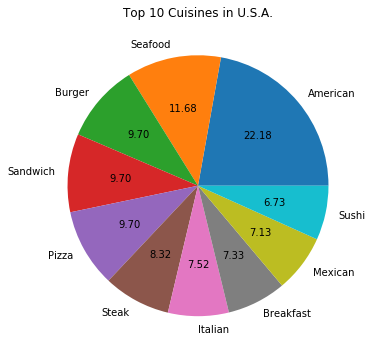

In [330]:
usa = d[d['Country Code']==216].copy()
usa.dropna(inplace = True)
cuisines = usa['Cuisines']
def dict(a):
    d = {}
    for i in a:
        if ',' not in i:
            d[i] = d.get(i,0) + 1
            
        else:
            c = i.strip().split(',');
            for j in c:
                d[j.strip()] = d.get(j.strip(),0)+1
    return d   
a = dict(cuisines)
a = sorted(a.items(), key=lambda x: x[1] , reverse = True)
cuisine = [i[0] for i in a]
count = [i[1] for i in a]
plt.subplots(figsize = (15,6))
plt.pie(count[0:10] , labels = cuisine[0:10] ,autopct = '%.2f')
plt.title('Top 10 Cuisines in U.S.A.')
plt.show()

# 3.5 Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.


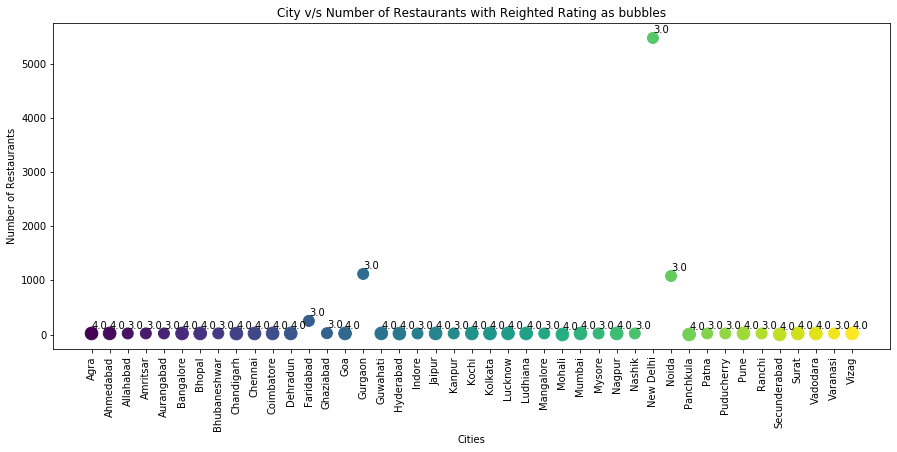

In [331]:
india = d[d['Country Code']== 1 ]
f = india[['Votes' , 'Aggregate rating', 'City']].copy()
f.dropna(inplace = True)
f = f[f['Aggregate rating'] != 0]
vote = f['Votes']
rating = f['Aggregate rating']
city = f['City']
z = {}
def dict(a,b,c):
    d = {}
    for i,j,k in zip(a,b,c):
        d[i] = d.get(i,0) + (j*k)
        z[i] = z.get(i,0) + (j)
                
    return d   


a = dict(city,vote , rating)
cities = india.City.value_counts().sort_index().index
count = india.City.value_counts().sort_index().values
weighted = [ int(a[i]/z[i])*40  for i in cities]
weight = [ format(a[i]/z[i],".2f")  for i in cities]
c = np.arange(len(weighted))

plt.subplots(figsize = (15,6))
plt.scatter( cities , count , s= (weighted), c =c)
for i in range(len(weighted)):
    plt.text(cities[i] , count[i]+90, int(weighted[i])/40 )
plt.xticks(rotation = 90)
plt.title('City v/s Number of Restaurants with Reighted Rating as bubbles')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')

plt.show()

In [332]:
print(tab(list(zip(india.City.value_counts().index,india.City.value_counts().values , weight))))

------------  ----  ----
New Delhi     5473  4.01
Gurgaon       1118  4.16
Noida         1080  3.41
Faridabad      251  3.76
Ghaziabad       25  3.43
Lucknow         21  4.5
Ahmedabad       21  4.13
Bhubaneshwar    21  3.97
Guwahati        21  4.11
Amritsar        21  4.32
Nashik          20  4.17
Kanpur          20  4.02
Kolkata         20  3.53
Ranchi          20  3.04
Allahabad       20  4.16
Nagpur          20  3.75
Kochi           20  4.27
Indore          20  4.49
Vadodara        20  4
Dehradun        20  4.28
Goa             20  3.85
Pune            20  4.14
Agra            20  4.3
Mumbai          20  4.32
Coimbatore      20  4.08
Patna           20  3.76
Vizag           20  4.3
Ludhiana        20  4.22
Aurangabad      20  3.76
Surat           20  4.11
Chennai         20  3.59
Jaipur          20  3.77
Varanasi        20  3.49
Bhopal          20  4.2
Mysore          20  3.46
Bangalore       20  3.74
Puducherry      20  4.28
Mangalore       20  3.57
Hyderabad       18  4.55
Chandig